In [539]:
#Importing neccessary Libararies
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

# Problem 1

In [540]:
#Importing the dataset for analysis df
df=pd.read_csv("cubic_zirconia.csv")

In [541]:
#Extracting the first five rows of the dataset df
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [542]:
#Dropping the unneccessary column "Unnamed: 0" fromthe dataset
df=df.drop("Unnamed: 0",axis=1)

In [543]:
#Checking if the column is dropped
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [544]:
#Extracting the dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [545]:
#Checking for any missing values
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [546]:
#Extracting the dataset description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [547]:
#Checking for duplicates in the dataset
df.duplicated().sum()
print("There are a total of",df.duplicated().sum(),"dupicate values in the dataset")

There are a total of 34 dupicate values in the dataset


In [548]:
#Extracting the the unique values in each column.
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [549]:
#Imputing Missing values
mean = df['depth'].mean()
df['depth'] = df['depth'].fillna(mean)  
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [550]:
#Checking for values which are equal to zero
df[df.carat==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [551]:
df[df.depth==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [552]:
df[df.x==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [553]:
df[df.price==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [554]:
df[df.y==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [555]:
df[df.z==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [556]:
#Replacing 0 values in to NaN
df.x=df.x.replace(to_replace=0,value=np.nan)

In [557]:
#Checking for Missing values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          0
z          0
price      0
dtype: int64

In [558]:
#Dropping the NaN values from the Dataset
df = df.dropna()  
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [559]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True) 

In [560]:
#Checking the number of dupicates and shape of the dataset after dropping them
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('shape after removing:',df.shape)

Number of duplicate rows = 0
shape after removing: (26931, 10)


In [561]:
#Extracting the column names
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\si

Shape before Outliers Treatment (26931, 10)


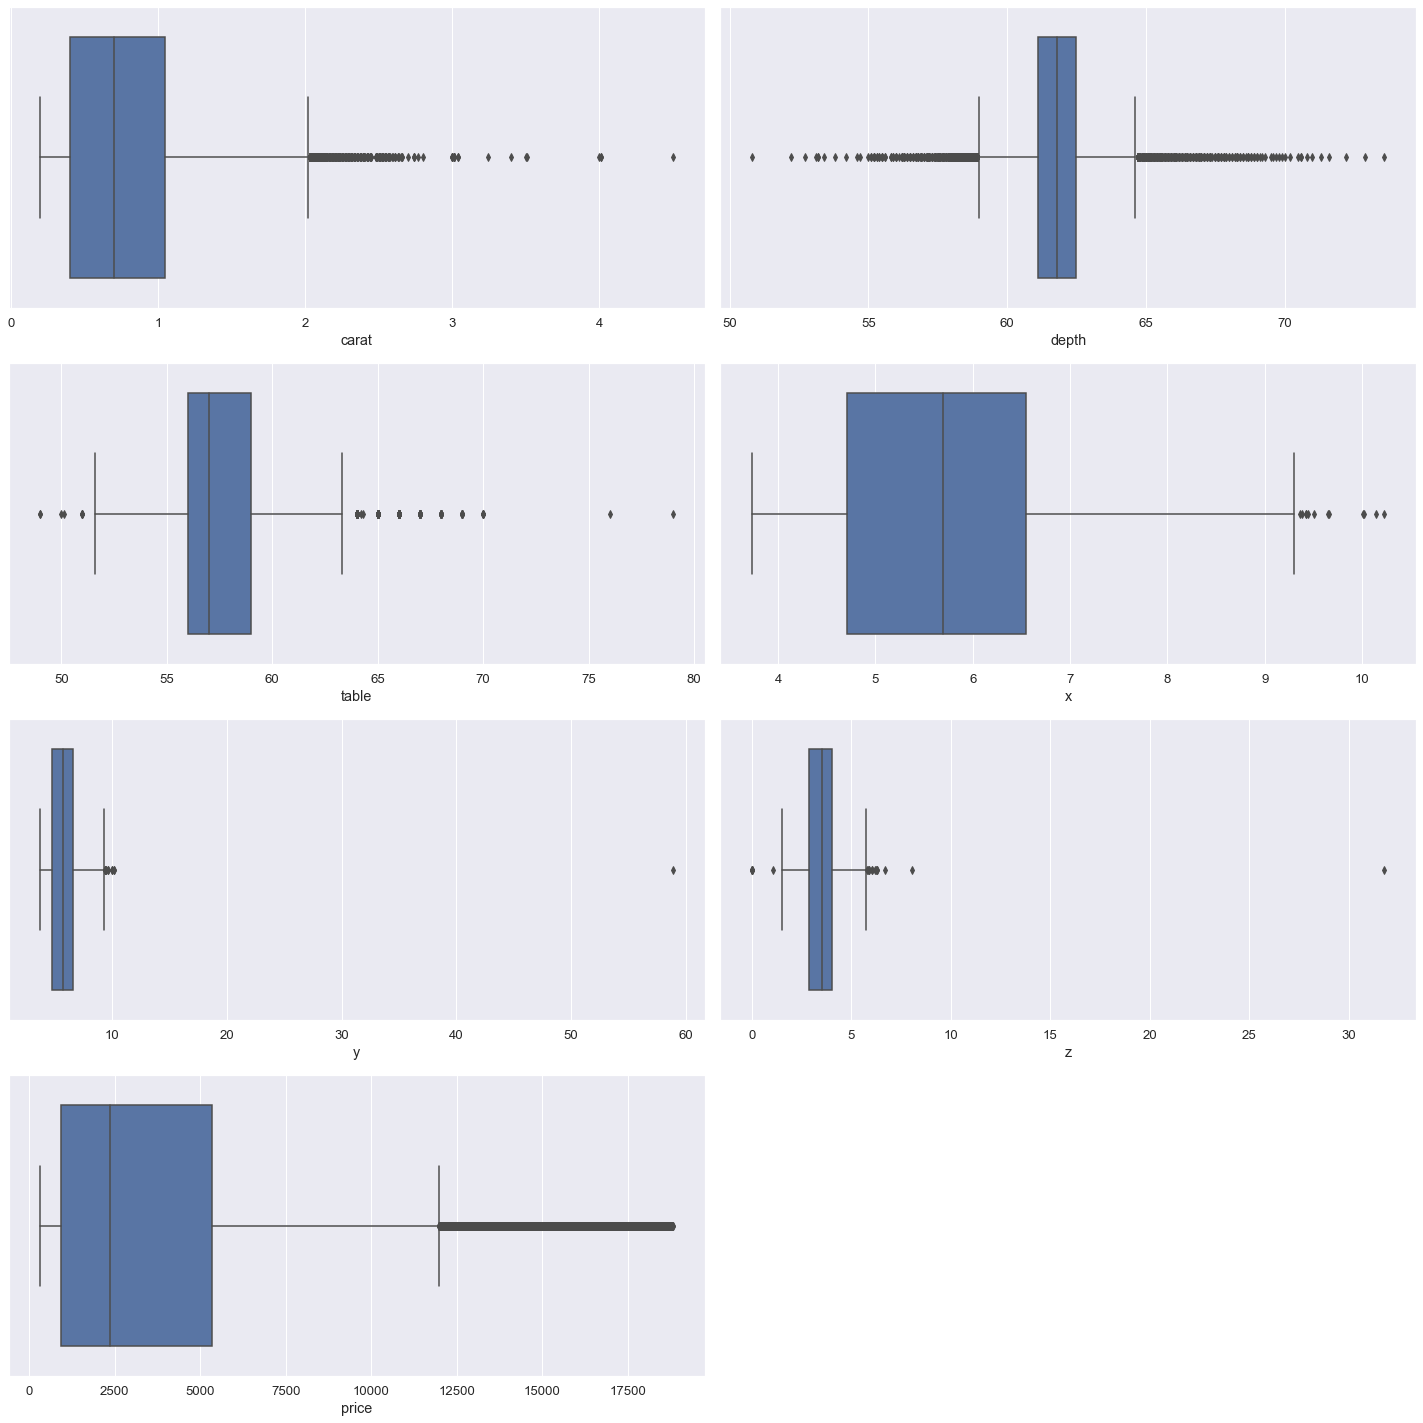

In [562]:
# Outlier Check
data_plot1=df[['carat', 'depth', 'table', 'x', 'y', 'z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot1.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot1[data_plot1.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)

In [563]:
# Removing the Outliers using MinMax Limit
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [564]:
lr,ur=remove_outlier(df['carat'])
df['carat']=np.where(df['carat']>ur,ur,df['carat'])
df['carat']=np.where(df['carat']<lr,lr,df['carat'])

In [565]:
lr,ur=remove_outlier(df['depth'])
df['depth']=np.where(df['depth']>ur,ur,df['depth'])
df['depth']=np.where(df['depth']<lr,lr,df['depth'])

In [566]:
lr,ur=remove_outlier(df['table'])
df['table']=np.where(df['table']>ur,ur,df['table'])
df['table']=np.where(df['table']<lr,lr,df['table'])

In [567]:
lr,ur=remove_outlier(df['x'])
df['x']=np.where(df['x']>ur,ur,df['x'])
df['x']=np.where(df['x']<lr,lr,df['x'])

In [568]:
lr,ur=remove_outlier(df['y'])
df['y']=np.where(df['y']>ur,ur,df['y'])
df['y']=np.where(df['y']<lr,lr,df['y'])

In [569]:
lr,ur=remove_outlier(df['z'])
df['z']=np.where(df['z']>ur,ur,df['z'])
df['z']=np.where(df['z']<lr,lr,df['z'])

In [570]:
lr,ur=remove_outlier(df['price'])
df['price']=np.where(df['price']>ur,ur,df['price'])
df['price']=np.where(df['price']<lr,lr,df['price'])

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\si

Shape after Outliers Treatment (26931, 10)


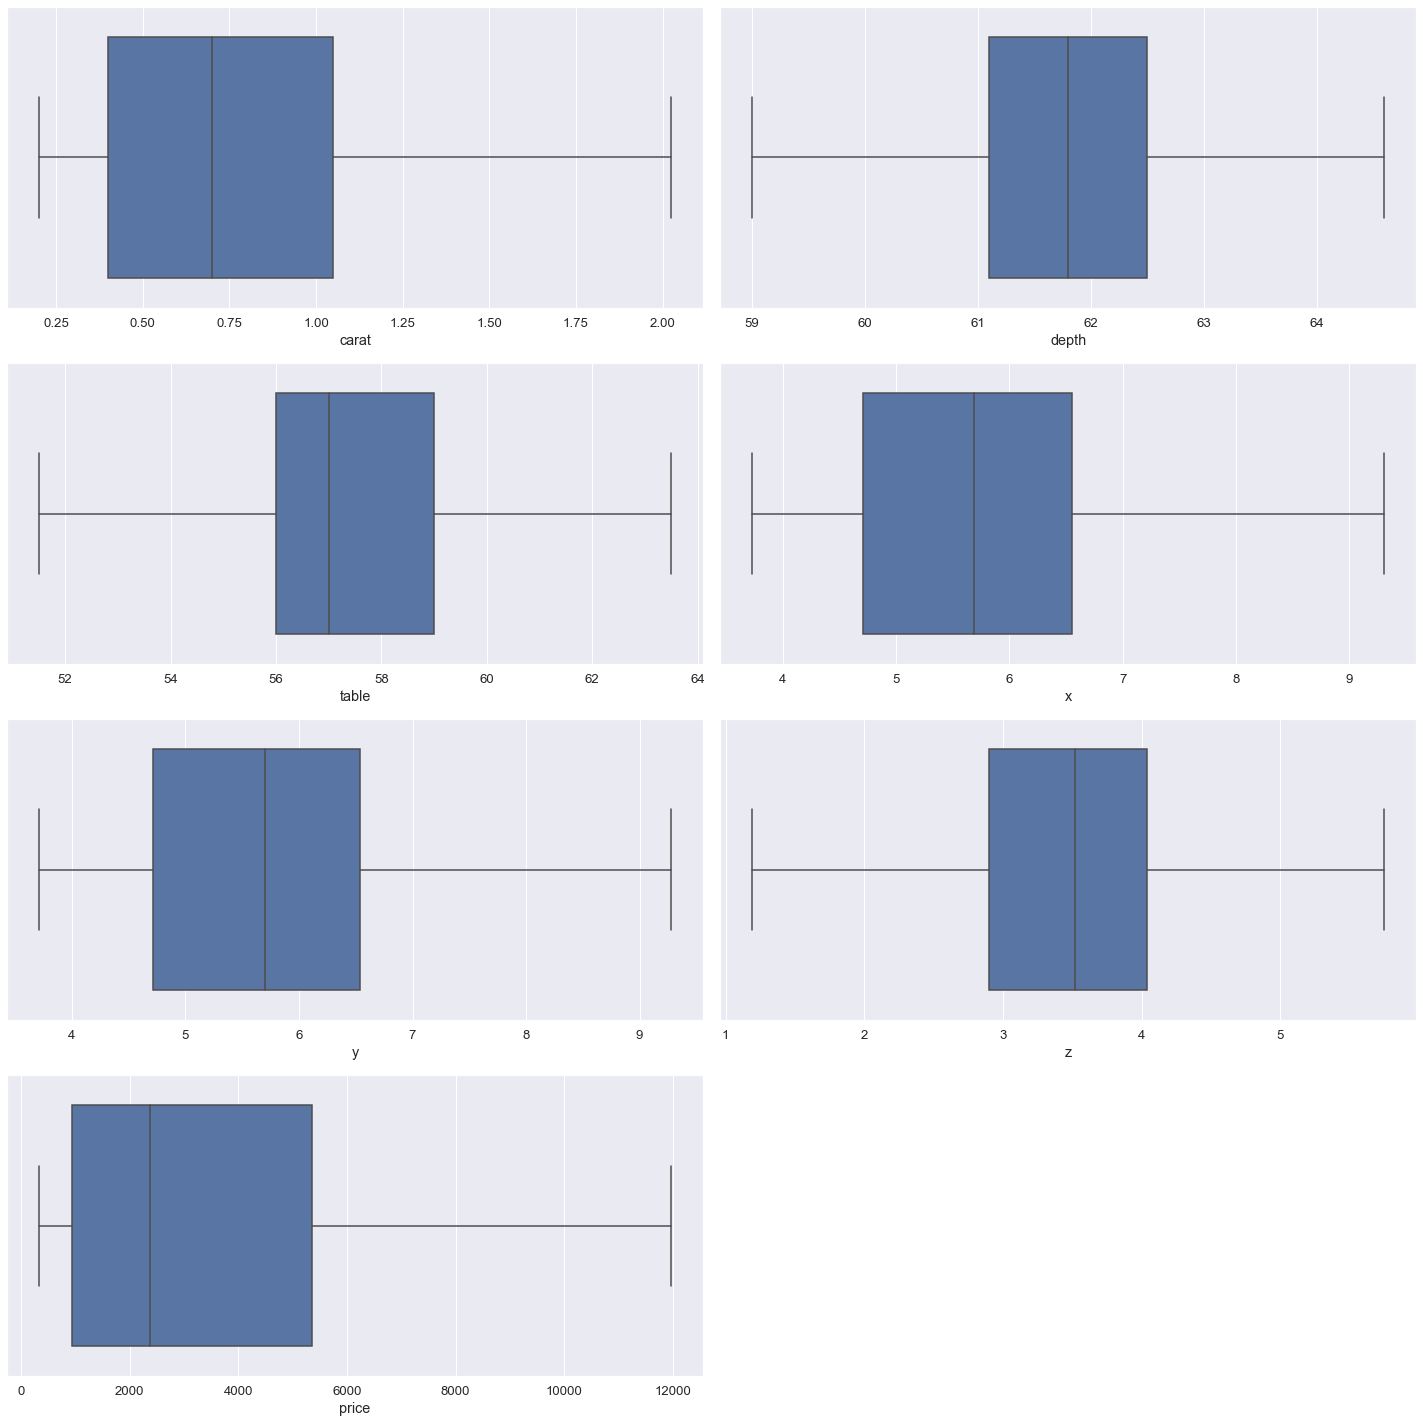

In [571]:
# OLutlier Check after the removing the outlier.
data_plot1=df[['carat', 'depth', 'table', 'x', 'y', 'z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot1.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot1[data_plot1.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',df.shape)

In [572]:
#Encoding the dataset with numbers
cat=df[['cut', 'color', 'clarity']]
num=df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]
for feature in cat.columns: 
    if cat[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(cat[feature].unique()))
        print(pd.Categorical(cat[feature].unique()).codes)
        cat[feature] = pd.Categorical(cat[feature]).codes



feature: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


feature: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


feature: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


C:\Users\Kewal\AppData\Local\Temp/ipykernel_17380/1872367798.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[feature] = pd.Categorical(cat[feature]).codes


In [573]:
#Extracting the top 5 data after Data Distribution/Encoding
cat.head()

,cut,color,clarity
0,2,1,2
1,3,3,1
2,4,1,7
3,2,2,4
4,2,2,6


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

After Outliers Treatment


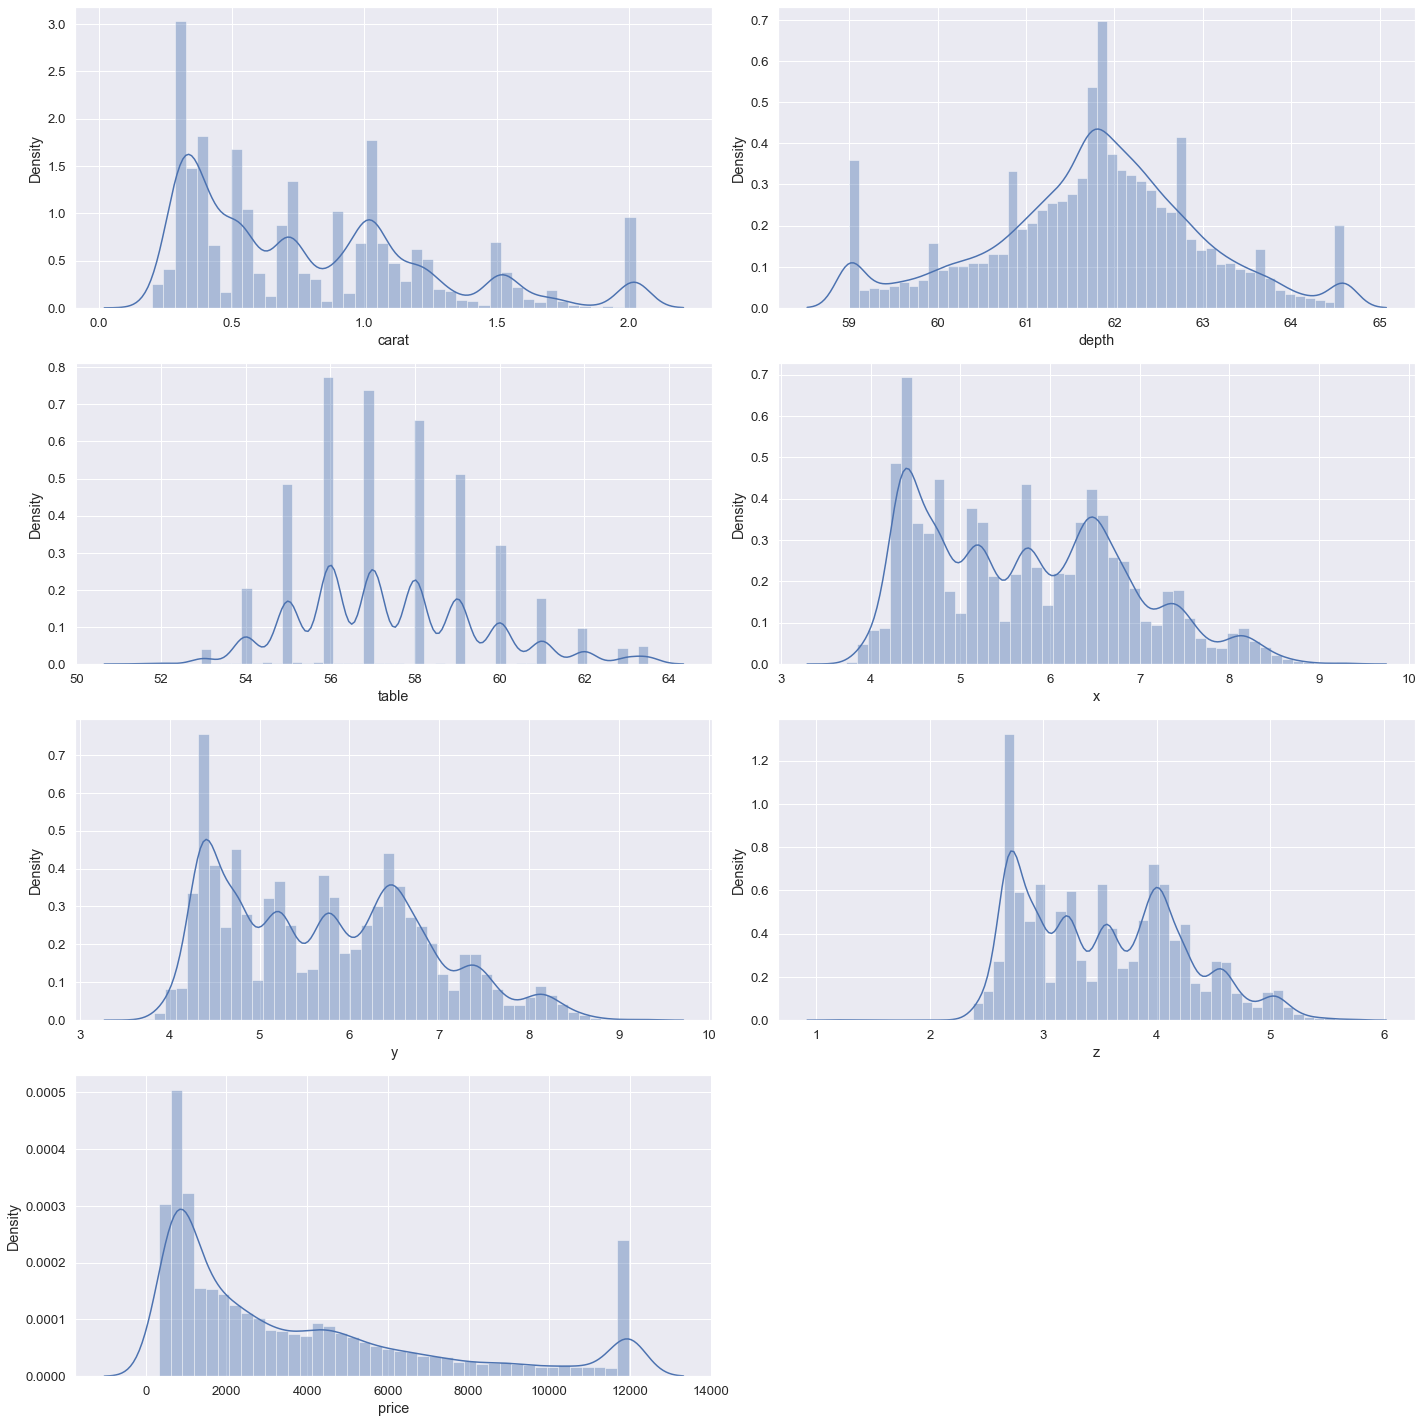

In [574]:
# Distribution Plot
data_plot2=num
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(data_plot2[data_plot2.columns[i]])
    plt.tight_layout()
print('After Outliers Treatment');

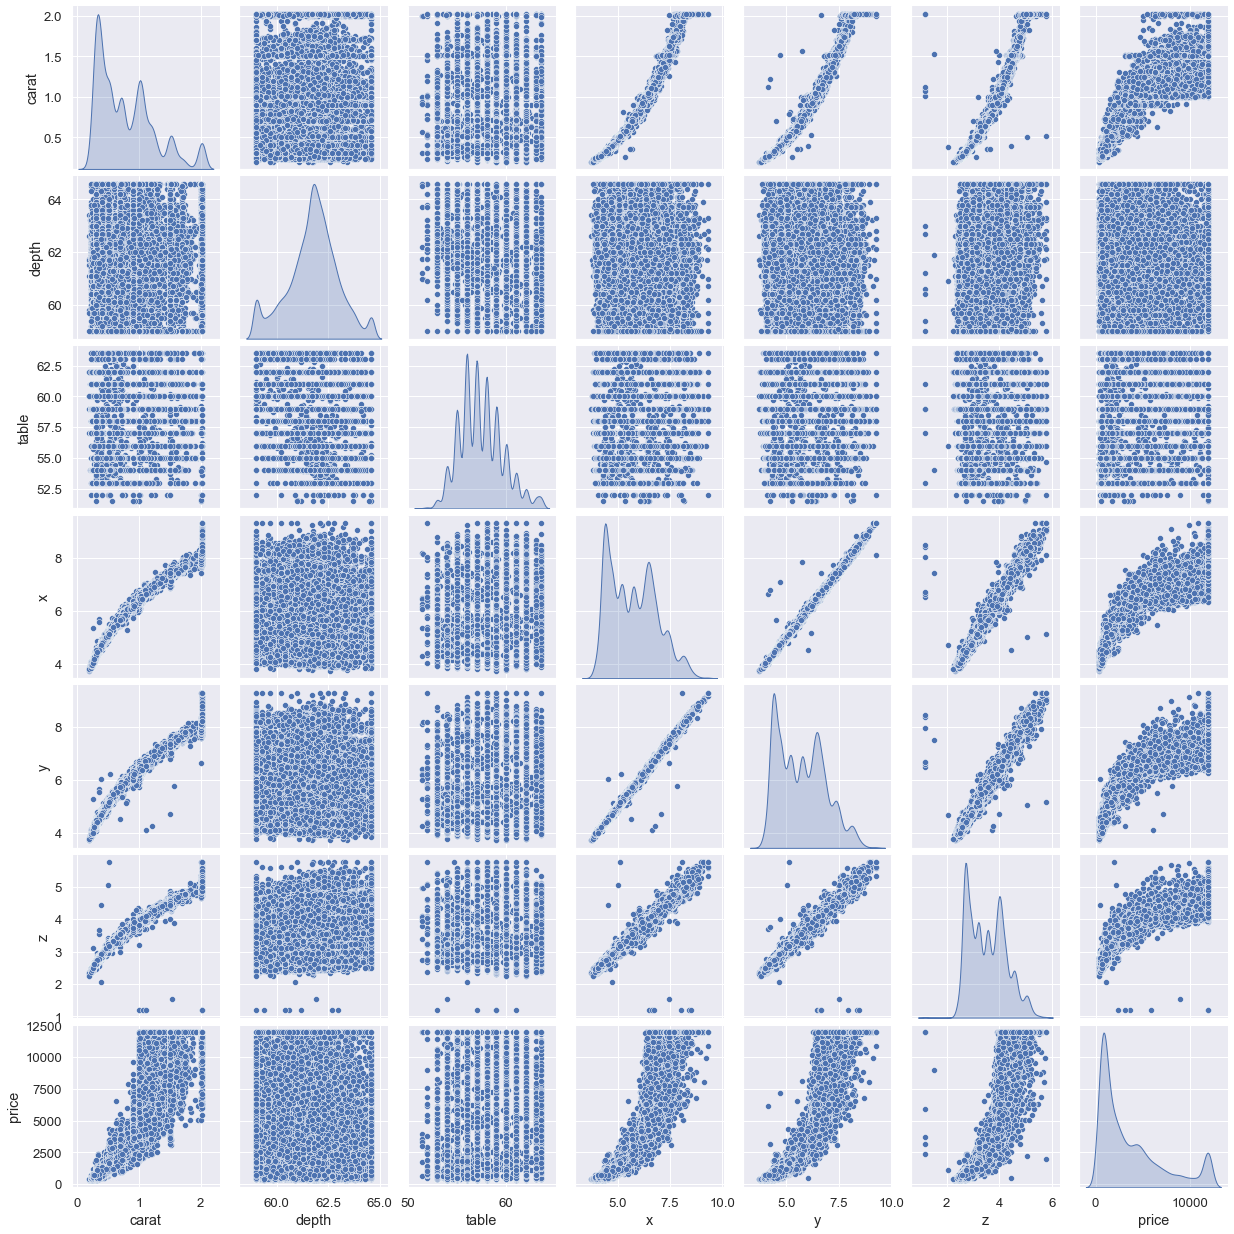

In [575]:
# PairPlot
sns.pairplot(num, diag_kind='kde')  
plt.show()

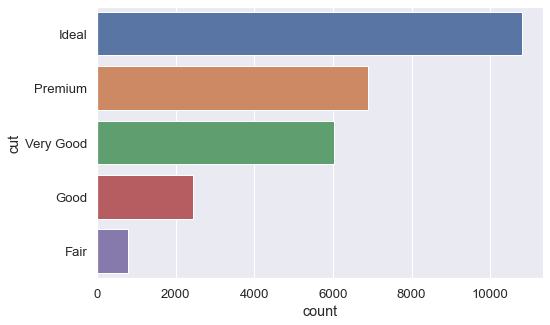

In [576]:
# Bar Graph for Variable Cut
plt.figure(figsize=(8,5))
sns.countplot(y=(df.cut));

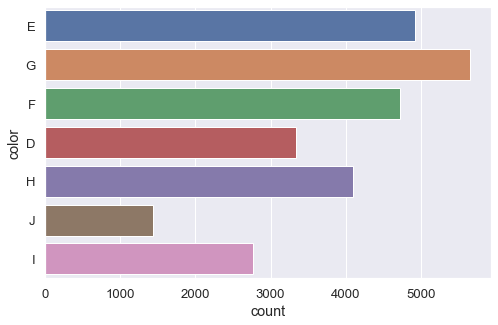

In [577]:
plt.figure(figsize=(8,5))
sns.countplot(y=(df.color));

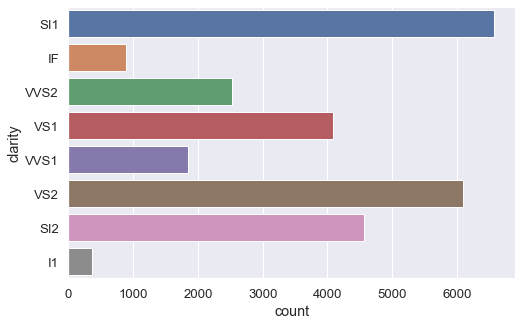

In [578]:
plt.figure(figsize=(8,5))
sns.countplot(y=(df.clarity));

In [579]:
# Checking for Correlations
num.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029479,0.187107,0.982880,0.981961,0.978002,0.936763
depth,0.029479,1.000000,-0.289312,-0.019929,-0.022965,0.095242,-0.000979
table,0.187107,-0.289312,1.000000,0.199678,0.194043,0.159976,0.137849
x,0.982880,-0.019929,0.199678,1.000000,0.998490,0.988158,0.913373
y,0.981961,-0.022965,0.194043,0.998490,1.000000,0.987830,0.914805
z,0.978002,0.095242,0.159976,0.988158,0.987830,1.000000,0.906306
price,0.936763,-0.000979,0.137849,0.913373,0.914805,0.906306,1.000000


<AxesSubplot:>

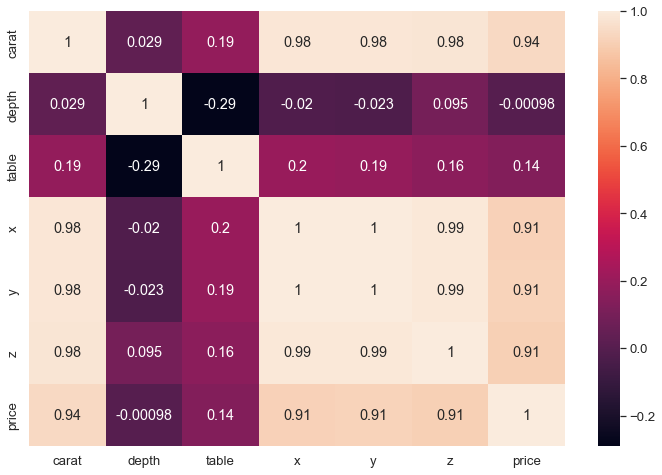

In [580]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.heatmap(num.corr(), annot=True)

In [581]:
#Scaling the dataset
SS = StandardScaler()

In [582]:
scaled_num = SS.fit_transform(num)
scaled_num = pd.DataFrame(scaled_num, index=num.index, columns=num.columns)
scaled_num.head()

,carat,depth,table,x,y,z,price
0,-1.067422,0.288053,0.261860,-1.296590,-1.289737,-1.259350,-0.933301
1,-1.002505,-0.778984,0.261860,-1.163343,-1.137638,-1.201918,-0.793452
2,0.230914,0.370133,1.189166,0.275730,0.347562,0.348755,0.736237
3,-0.807755,-0.122346,-0.665445,-0.808016,-0.833441,-0.828608,-0.765194
4,-1.045783,-1.107304,0.725513,-1.225525,-1.164479,-1.273708,-0.852563


In [583]:
# Concatening the scaled num and Cat into one dataframe
scaled_df = pd.concat([cat, scaled_num], axis=1)
scaled_df.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
0,2,1,2,-1.067422,0.288053,0.261860,-1.296590,-1.289737,-1.259350,-0.933301
1,3,3,1,-1.002505,-0.778984,0.261860,-1.163343,-1.137638,-1.201918,-0.793452
2,4,1,7,0.230914,0.370133,1.189166,0.275730,0.347562,0.348755,0.736237
3,2,2,4,-0.807755,-0.122346,-0.665445,-0.808016,-0.833441,-0.828608,-0.765194
4,2,2,6,-1.045783,-1.107304,0.725513,-1.225525,-1.164479,-1.273708,-0.852563


In [584]:
# Copying all the predictor variables into X dataframe
X = scaled_df.drop('price', axis=1)

# Copying target into the y dataframe. 
Y = scaled_df[['price']]

In [585]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)

In [586]:
#Concatening the test and the train data respectively in different DataFrames
train = pd.concat([X_train, Y_train], axis=1)
test=pd.concat([X_test,Y_test],axis=1)
train.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
2275,2,1,5,-1.067422,-0.450665,-1.129098,-1.225525,-1.271843,-1.273708,-0.833821
12311,2,3,4,0.944998,-0.122346,-0.201793,0.986383,1.045428,0.994868,2.053990
5030,1,1,3,0.663692,1.273010,-0.665445,0.711005,0.759124,0.880004,0.094950
8481,3,5,5,1.529249,-0.532745,1.189166,1.421658,1.456989,1.368178,1.653763
25220,4,5,3,2.665292,0.862611,1.189166,2.007947,2.074332,2.157873,2.374706


In [587]:
test.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
19266,3,3,4,-0.829394,-1.435623,1.652819,-0.772483,-0.860282,-0.929115,-0.800084
22435,4,4,3,0.901720,-0.532745,1.189166,1.004150,1.054375,0.966152,0.361961
20645,2,5,2,-0.569727,-0.122346,-0.387254,-0.479339,-0.466614,-0.469656,-0.752218
308,1,3,4,0.101080,1.519250,-0.201793,0.222431,0.177569,0.363113,-0.121023
14666,2,0,6,-1.110700,-0.040266,-0.201793,-1.358772,-1.343419,-1.345499,-0.901871


In [588]:
expr= 'price ~ carat+ cut+ color+clarity+ depth+ table+ x+ y+ z'

In [589]:
lm1 = smf.ols(formula= expr, data =train).fit()
print(format(round(lm1.params,2)))

Intercept   -0.14
carat        1.23
cut          0.01
color       -0.07
clarity      0.07
depth       -0.03
table       -0.05
x           -0.61
y            0.44
z           -0.06
dtype: float64


In [590]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.099e+04
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:16:20   Log-Likelihood:                -4107.3
No. Observations:               18851   AIC:                             8235.
Df Residuals:                   18841   BIC:                             8313.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1392      0.008    -16.441      0.0

In [591]:
# Calculate Mean Squared Error (MSE) for train
mse_train = np.mean((lm1.predict(train.drop('price',axis=1))-train['price'])**2)
print("The Mean Squared Error for train data is:",mse_train)

The Mean Squared Error for train data is: 0.09052665884326185


In [592]:
#Root Mean Squared Error - RMSE
np.sqrt(mse_train)
print("The root Mean Squared error for train Data is:", np.sqrt(mse_train))

The root Mean Squared error for train Data is: 0.30087648436403575


In [593]:
# Calculate Mean Squared Error (MSE) for test
mse_test = np.mean((lm1.predict(test.drop('price',axis=1))-test['price'])**2)
print("The Mean Squared Error for test data is:",mse_test)

The Mean Squared Error for test data is: 0.08984105206618852


In [594]:
#Root Mean Squared Error - RMSE
np.sqrt(mse_test)
print("The root Mean Squared Error for test data is:",np.sqrt(mse_test))

The root Mean Squared Error for test data is: 0.29973496970855523


In [595]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end='')

(-0.14) * Intercept +(1.23) * carat +(0.01) * cut +(-0.07) * color +(0.07) * clarity +(-0.03) * depth +(-0.05) * table +(-0.61) * x +(0.44) * y +(-0.06) * z +

In [596]:
y_pred = lm1.predict(test)

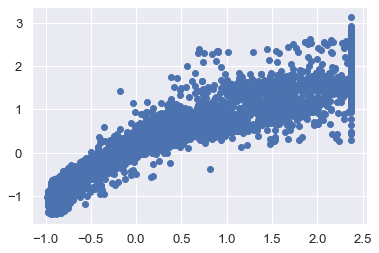

In [597]:
plt.scatter(test['price'],y_pred)
plt.show()

In [598]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [599]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

cut ---> 4.393244253059092
color ---> 3.1075050075605417
clarity ---> 4.295847713212699
carat ---> 32.22638853574856
depth ---> 2.5801489452711115
table ---> 1.179251706941634
x ---> 380.01456752002485
y ---> 366.81205340602287
z ---> 104.79386394021651


# LinearRegression function without scaling to check above results

In [600]:
unscaled_df = pd.concat([cat, num], axis=1)
unscaled_df.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
0,2,1,2,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,3,3,1,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,4,1,7,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,2,2,4,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,2,2,6,0.31,60.4,59.0,4.35,4.43,2.65,779.0


In [601]:
unscaled_df = pd.DataFrame(unscaled_df, index=unscaled_df.index, columns=unscaled_df.columns)
unscaled_df.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
0,2,1,2,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,3,3,1,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,4,1,7,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,2,2,4,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,2,2,6,0.31,60.4,59.0,4.35,4.43,2.65,779.0


In [602]:
# Copy all the predictor variables into X dataframe
x = unscaled_df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = unscaled_df[['price']]

In [603]:
# Split x and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)

In [604]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [605]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cut is 43.41885676565526
The coefficient for color is -225.7185000091394
The coefficient for clarity is 251.19760146785285
The coefficient for carat is 9227.046878634877
The coefficient for depth is -97.19552592061507
The coefficient for table is -73.92168040739321
The coefficient for x is -1879.3332650774296
The coefficient for y is 1358.7998834384387
The coefficient for z is -274.88826107349945


In [606]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10132.829216822687


In [607]:
# R square on training data
regression_model.score(x_train, y_train)
print("The R square on training data is:",regression_model.score(x_train, y_train) )

The R square on training data is: 0.9093144969532128


In [608]:
# R square on testing data
regression_model.score(x_test, y_test)
print("The Rsquare on test data is :",regression_model.score(x_test, y_test))

The Rsquare on test data is : 0.9105216499027526


In [609]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("The Root of mean sqaure error on train Data is :",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

The Root of mean sqaure error on train Data is : 1043.4470211464966


In [610]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("The Root of mean sqaure error on Test Data is :",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

The Root of mean sqaure error on Test Data is : 1039.4882203469824


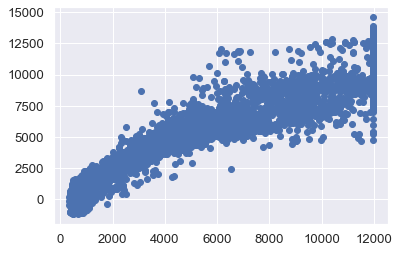

In [611]:
plt.scatter(y_test['price'], predicted_test)
plt.show()

# Problem 2

In [612]:
#IMporting the file and dropping the Unnamed: 0 column
df2 = pd.read_csv("Holiday_Package.csv").drop('Unnamed: 0',axis=1)

In [613]:
#Printing the top 5 rows of the dataset
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [614]:
#Shape of the dataset
df2.shape
print("The total no. of rows and columns respective;y are:", df2.shape)

The total no. of rows and columns respective;y are: (872, 7)


In [615]:
# Extracting the values in theHolliday Package column
df2.Holliday_Package.value_counts(normalize = True)*100

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64

In [616]:
# Extracting the values in the Foreign column
df2.foreign.value_counts(normalize = True)*100

no     75.229358
yes    24.770642
Name: foreign, dtype: float64

In [617]:
# Extracting the values in the educ column
df2.educ.value_counts(bins=2, sort=False, normalize = True)*100

(0.979, 11.0]    74.311927
(11.0, 21.0]     25.688073
Name: educ, dtype: float64

In [618]:
# Extracting the values in the no_young_children column
df2.no_young_children.value_counts(normalize = True)*100

0    76.261468
1    16.857798
2     6.307339
3     0.573394
Name: no_young_children, dtype: float64

In [619]:
# Extracting the values in the no_older_children column
df2.no_older_children.value_counts(normalize = True)*100

0    45.068807
2    23.853211
1    22.706422
3     6.307339
4     1.605505
5     0.229358
6     0.229358
Name: no_older_children, dtype: float64

In [620]:
df2.age.value_counts(bins=4, sort=False,normalize = True)*100


(19.956999999999997, 30.5]    20.986239
(30.5, 41.0]                  35.435780
(41.0, 51.5]                  27.408257
(51.5, 62.0]                  16.169725
Name: age, dtype: float64

In [621]:
df2.age.value_counts(bins=4, sort=False)

(19.956999999999997, 30.5]    183
(30.5, 41.0]                  309
(41.0, 51.5]                  239
(51.5, 62.0]                  141
Name: age, dtype: int64

In [622]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [623]:
# Checking for missing values ?
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [624]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


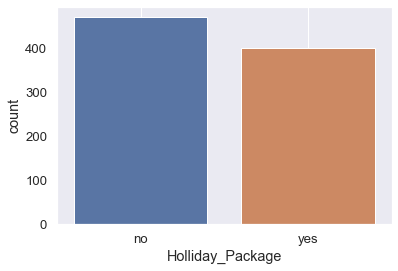

In [625]:
# Plotting the bar graph for Holliday Package.
sns.countplot(df2.Holliday_Package)
plt.grid()
plt.show()

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


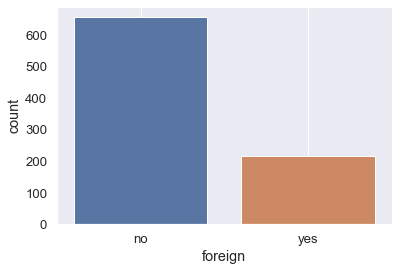

In [626]:
# Plotting the bar graph for Foreign Variable.
sns.countplot(df2.foreign)
plt.grid()
plt.show()

In [627]:
# Geting unique counts of Variables
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [628]:
for column in df2[['Holliday_Package', 'educ', 'no_young_children',
       'no_older_children', 'foreign' ]]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


EDUC :  20
1       1
21      1
18      1
19      2
17      3
2       6
16     10
3      11
15     15
6      21
14     25
7      31
13     43
4      50
5      67
10     90
11    100
9     114
12    124
8     157
Name: educ, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64


NO_OLDER_CHILDREN :  7
5      2
6      2
4     14
3     55
1    198
2    208
0    393
Name: no_older_children, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [629]:
# Are there any duplicates ?
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

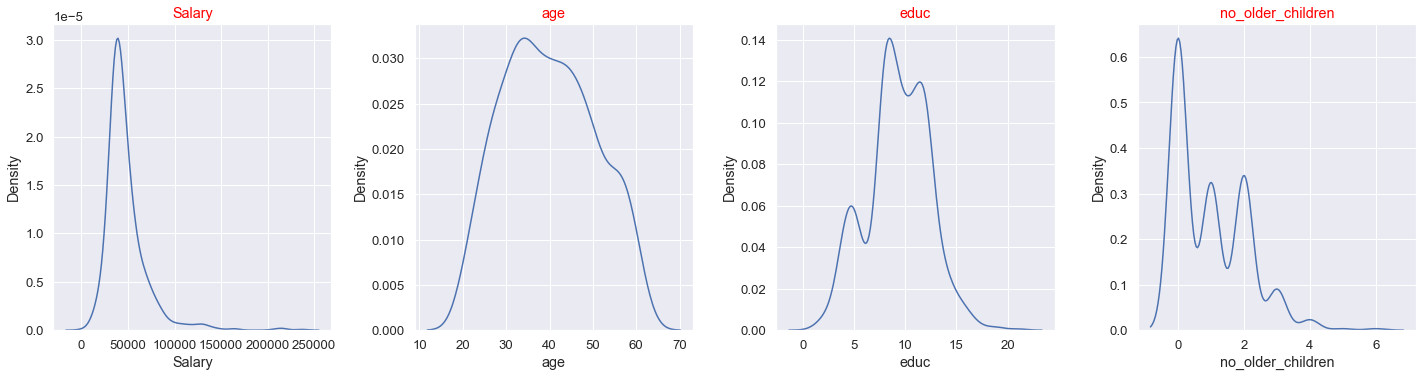

In [630]:
#Plotting the distribution plot 
data_plot=df2[['Salary', 'age', 'educ',  'no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


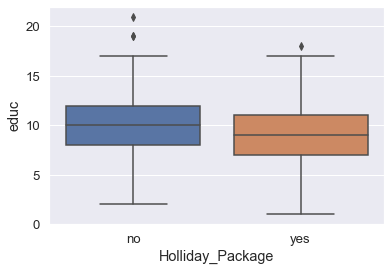

In [631]:
sns.boxplot(df2["Holliday_Package"],df2['educ']);

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\si

Shape before Outliers Treatment (872, 7)


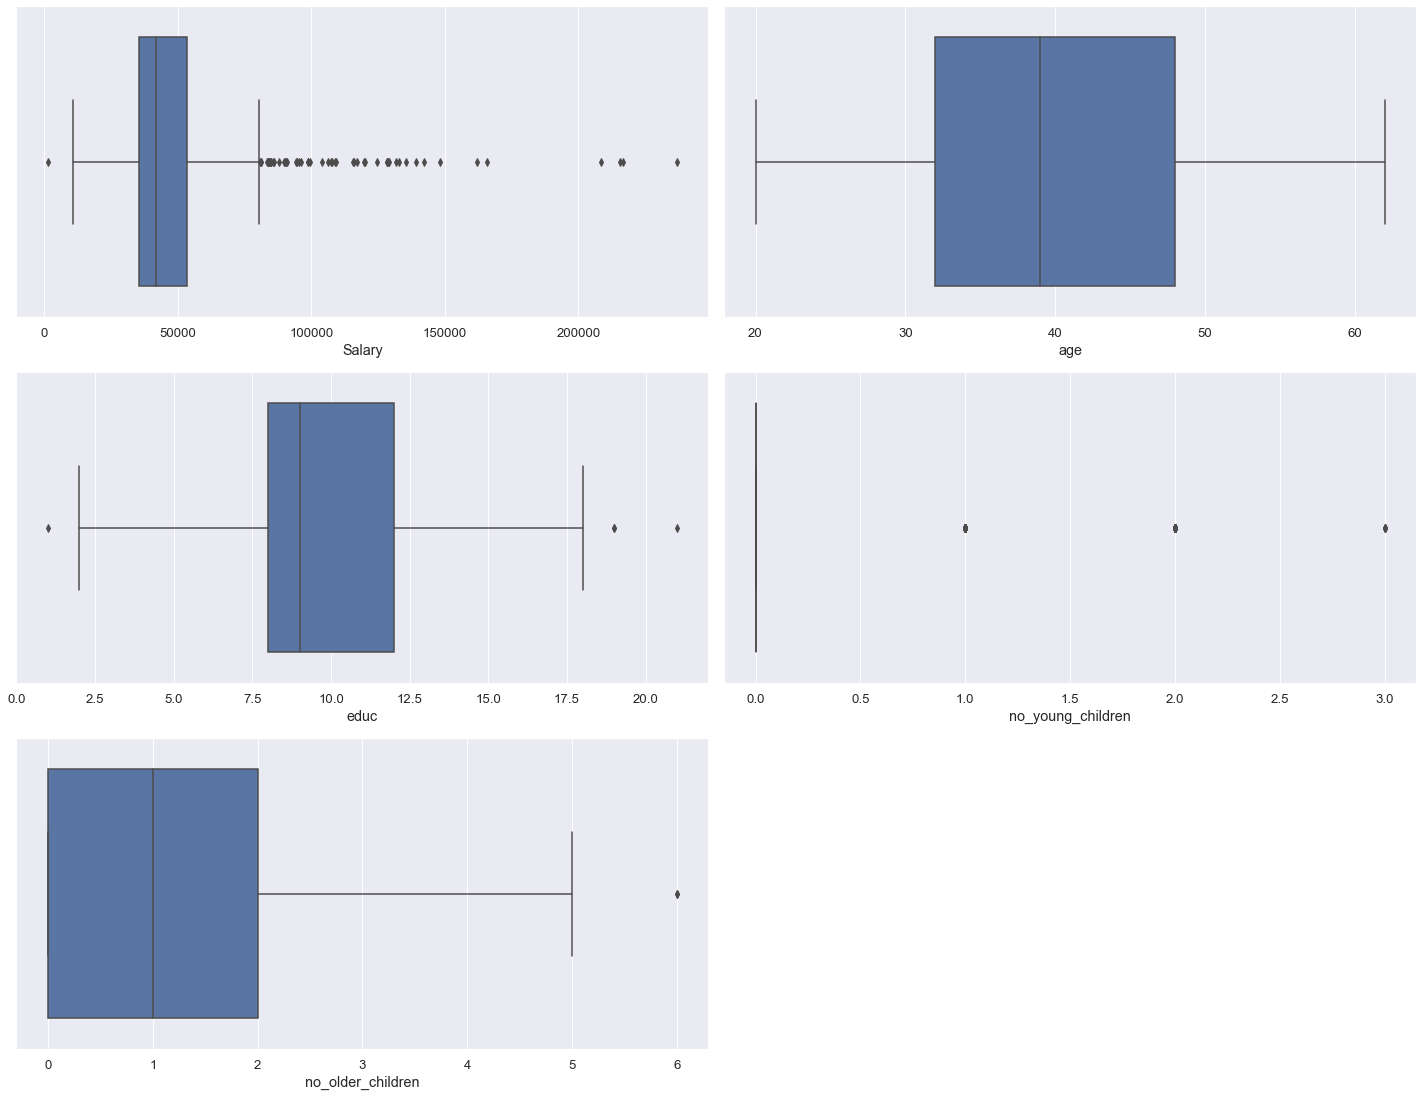

In [632]:
# Checking for outliers
data_plot2=df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot2[data_plot2.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df2.shape)

In [633]:
#Removing the outilers from Salary
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [634]:
lr,ur=remove_outlier(df2['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df2['Salary']=np.where(df2['Salary']>ur,ur,df2['Salary'])
df2['Salary']=np.where(df2['Salary']<lr,lr,df2['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


<AxesSubplot:>

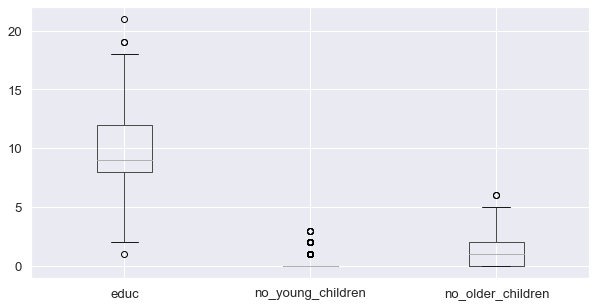

In [635]:
plt.figure(figsize=(10,5))
df2[['educ', 'no_young_children',
       'no_older_children', 'foreign']].boxplot(vert=1)

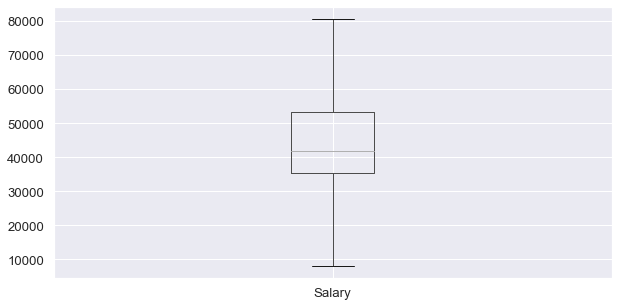

In [636]:
# Boxplot after outlier treatment
plt.figure(figsize=(10,5))
df2[['Salary' ]].boxplot(vert=1);

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


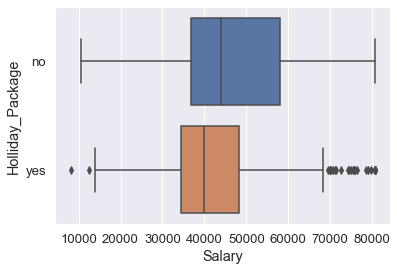

In [637]:
sns.boxplot(df2['Salary'],df2['Holliday_Package']);

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


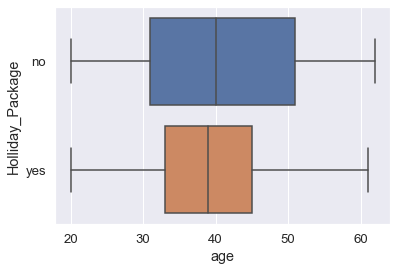

In [638]:
sns.boxplot(df2['age'],df2['Holliday_Package']);

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


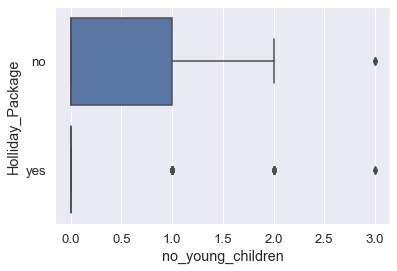

In [639]:
sns.boxplot(df2['no_young_children'],df2['Holliday_Package']);

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


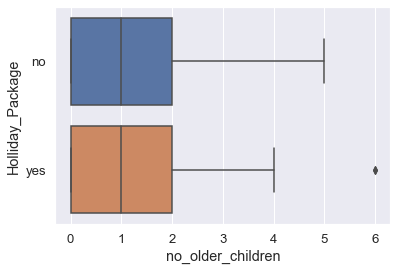

In [640]:
sns.boxplot(df2['no_older_children'],df2['Holliday_Package']);

<AxesSubplot:xlabel='foreign', ylabel='count'>

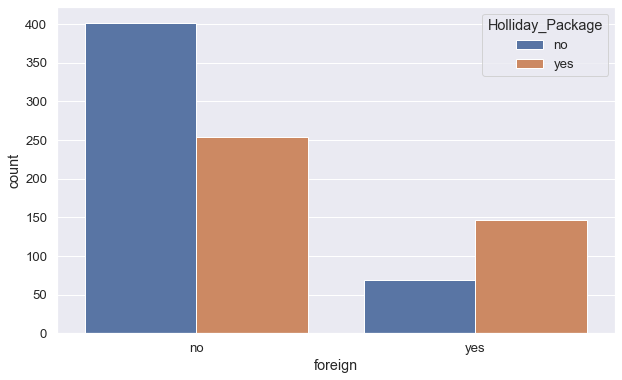

In [649]:
plt.figure(figsize=(10,6))
sns.countplot(data = df2, x='foreign',hue='Holliday_Package')

<AxesSubplot:xlabel='educ', ylabel='count'>

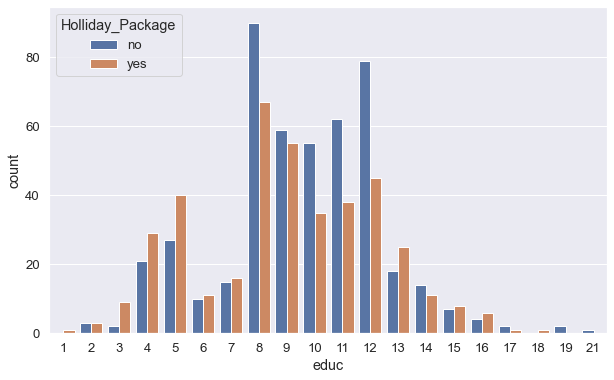

In [644]:
plt.figure(figsize=(10,6))
sns.countplot(data = df2, x='educ',hue='Holliday_Package')

<AxesSubplot:xlabel='no_young_children', ylabel='count'>

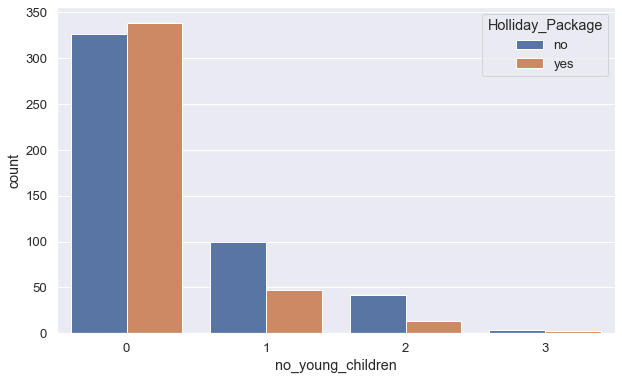

In [645]:
plt.figure(figsize=(10,6))
sns.countplot(data = df2, x='no_young_children',hue='Holliday_Package')

<AxesSubplot:xlabel='no_older_children', ylabel='count'>

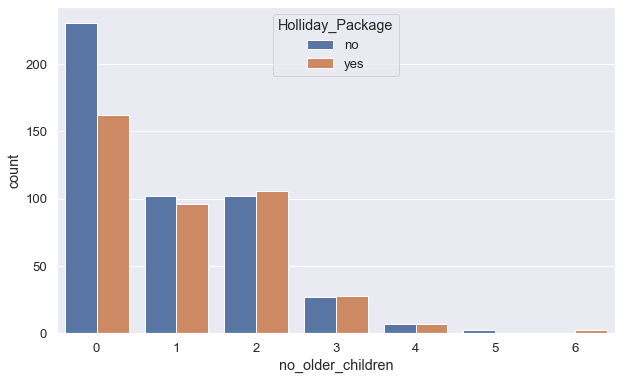

In [646]:
plt.figure(figsize=(10,6))
sns.countplot(data = df2, x='no_older_children',hue='Holliday_Package')

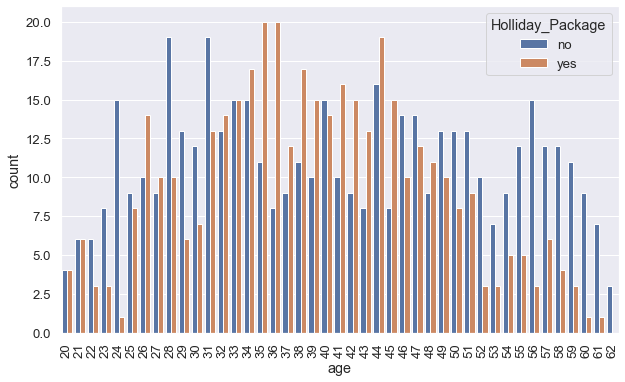

In [652]:
plt.figure(figsize=(10,6))
sns.countplot(data = df2, x='age',hue='Holliday_Package')
plt.xticks(rotation=90);

C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kewal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

After Outliers Treatment


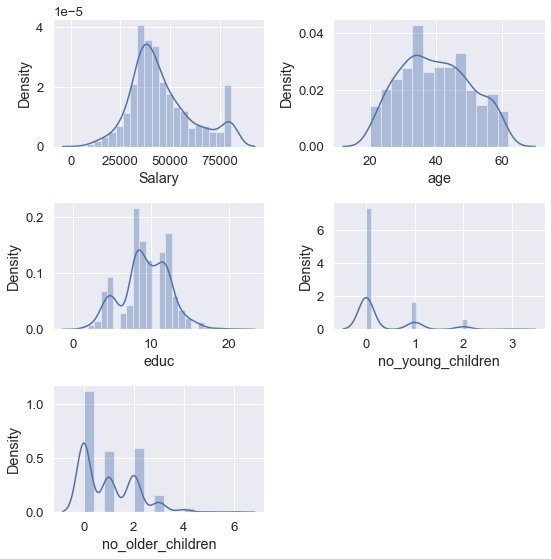

In [653]:
# Plotting the distribution plot after the outlier treatment
data_plot2=df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']]
fig=plt.figure(figsize=(8,8))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.distplot(data_plot2[data_plot2.columns[i]])
    plt.tight_layout()
print('After Outliers Treatment')

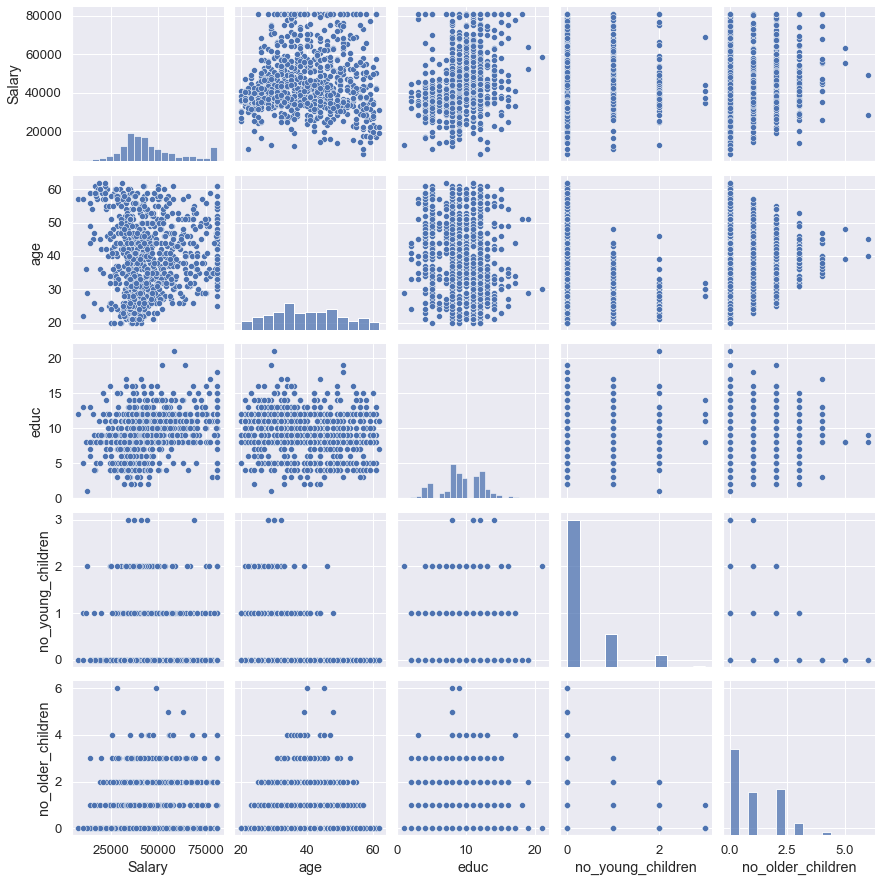

In [654]:
# Pairplot
sns.pairplot(df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']])

In [655]:
# Checking for Corrleation
df2.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000


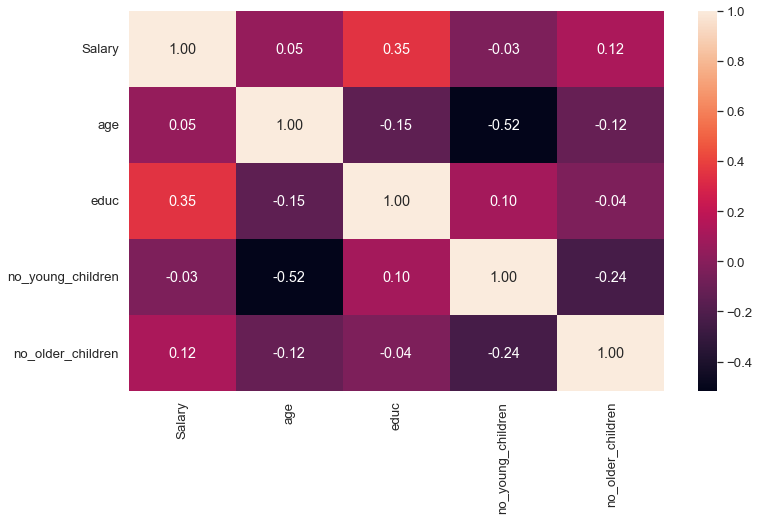

In [656]:
# Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']].corr(),annot=True,fmt='.2f')
plt.show()

In [657]:
#Converting the Objects to categorical Codes/Encoding
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [658]:
#Proportions of 1 and 0
df2.Holliday_Package.value_counts(normalize=True)*100

0    54.013761
1    45.986239
Name: Holliday_Package, dtype: float64

In [659]:
df2.foreign.value_counts(normalize=True)*100

0    75.229358
1    24.770642
Name: foreign, dtype: float64

In [660]:
# Extracting the target column into separate vectors for training set and test set
X = df2.drop("Holliday_Package" , axis=1)

y = df2.pop("Holliday_Package")

X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


In [661]:
# Splitting the dataset into Training and test data
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

0    53.442623
1    46.557377
Name: Holliday_Package, dtype: float64


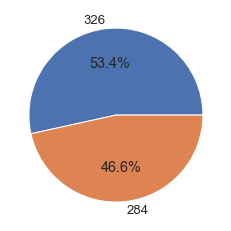

In [662]:
# Checking whether the data is split properly
plt.pie(train_labels.value_counts(), labels=train_labels.value_counts().values, autopct='%1.1f%%');
print(train_labels.value_counts(normalize=True)*100)

0    55.343511
1    44.656489
Name: Holliday_Package, dtype: float64


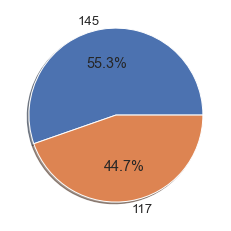

In [663]:
plt.pie(test_labels.value_counts(), labels=test_labels.value_counts().values, autopct='%1.1f%%', shadow=True);
print(test_labels.value_counts(normalize=True)*100)

In [664]:
# Checking the dimensions of the training and testing data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (610, 6)
X_test (262, 6)
train_labels (610,)
test_labels (262,)


In [665]:
# Logistic Regression model with GridSearchCV
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [666]:
grid={'penalty':['elasticnet','l2','none','l1'],
      'solver':['newton-cg','liblinear'],
      'tol':[0.0001,0.00001,0.000001],
      'verbose':[True, False]
      }

In [667]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')

In [668]:
grid_search.fit(X_train, train_labels)

[LibLinear]

C:\Users\Kewal\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.60643634 0.60643634 0.60643634 0.60643634 0.60643634 0.60643634
 0.17017316 0.17017316 0.60329741 0.60329741 0.59822022 0.59822022
 0.60507513 0.60507513 0.60507513 0.60507513 0.60507513 0.60507513
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.60424951 0.60597868 0.60805269 0.60499996 0.60921379 0.60921379]
  warnings.warn(
C:\Users\Kewal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['elasticnet', 'l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05, 1e-06],
                         'verbose': [True, False]},
             scoring='f1')

In [669]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06, 'verbose': True} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06, verbose=True)


In [670]:
best_model = grid_search.best_estimator_

In [671]:
# Prediction for Test and train data
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [672]:
# Training Data Probability Prediction
y_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
y_prob_test = model.predict_proba(X_test)

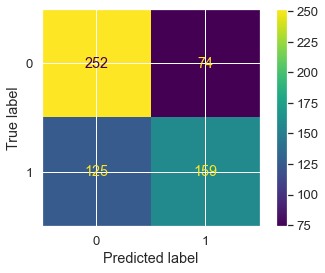

In [673]:
# Confusion matrix on the train data
plot_confusion_matrix(best_model,X_train,train_labels);

In [674]:
# Classid=fication report for train data
print('training data',classification_report(train_labels, ytrain_predict),'\n')

training data               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 



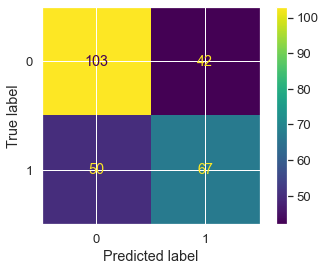

In [675]:
# Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,test_labels);

In [676]:
# Classification report for test data
print('testing data',classification_report(test_labels, ytest_predict),'\n');

testing data               precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [677]:
#Accuracy - Training Data
model.score(X_train, train_labels)
print("The accuracy for the Training data is:",model.score(X_train, train_labels))

The accuracy for the Training data is: 0.6754098360655738


In [678]:
# best model Accuracy - Training Data
best_model.score(X_train, train_labels)
print(" The best model accuracy for training data is :",best_model.score(X_train, train_labels))

 The best model accuracy for training data is : 0.6737704918032786


In [679]:
# Accuracy - Test Data
model.score(X_test, test_labels)
print(" The accuracy for testing data is:",model.score(X_test, test_labels))

 The accuracy for testing data is: 0.6374045801526718


In [680]:
# Best Model Accuracy - Test Data
best_model.score(X_test, test_labels)
print(" The best model accuracy for Testing data is:",best_model.score(X_test, test_labels))

 The best model accuracy for Testing data is: 0.648854961832061


AUC for the Training Data: 0.742
AUC for the Test Data: 0.705


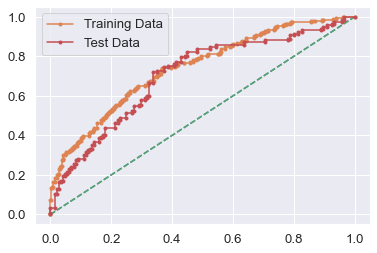

In [681]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(train_labels,y_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,y_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,y_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,y_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# LINEAR DISCRIMINANT ANALYSIS

In [682]:
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train,train_labels)

In [683]:
#Accuracy - Training Data
ldamodel.score(X_train, train_labels)
print(" The accuracy for training data in LDA is:",ldamodel.score(X_train, train_labels) )

 The accuracy for training data in LDA is: 0.6754098360655738


In [684]:
# Accuracy - Test Data
ldamodel.score(X_test, test_labels)
print(" The accuracy for testing data in LDA is:",ldamodel.score(X_test, test_labels))

 The accuracy for testing data in LDA is: 0.6412213740458015


In [694]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = ldamodel.predict(X_train)
pred_class_train

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [686]:
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ldamodel.predict(X_test)
pred_class_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int8)

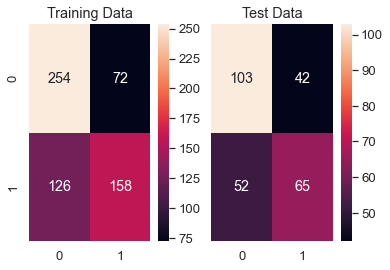

In [687]:
#Plotting confusion matrix for the different models for the Training ad testing Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(train_labels,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(test_labels,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [688]:
# Classification report for Training report
print('Classification Report of the training data:\n\n',metrics.classification_report(train_labels,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 



In [689]:
# Classification report for testing data
print('Classification Report of the test data:\n\n',metrics.classification_report(test_labels,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [690]:
# Training Data Probability Prediction
pred_prob_train = ldamodel.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ldamodel.predict_proba(X_test)

In [691]:
pred_prob_train[:,1]

array([0.24854905, 0.75202351, 0.05086595, 0.30329566, 0.54677797,
       0.78005142, 0.39773898, 0.26163217, 0.19359003, 0.30016427,
       0.27438154, 0.23699582, 0.35687259, 0.47202148, 0.42613958,
       0.76720336, 0.77898619, 0.13274274, 0.4351178 , 0.8898699 ,
       0.70801993, 0.18223542, 0.21662696, 0.62916337, 0.2540067 ,
       0.29460693, 0.6545642 , 0.3330259 , 0.84968252, 0.29497333,
       0.71390418, 0.79700845, 0.50578166, 0.27130116, 0.32916253,
       0.5446035 , 0.53075922, 0.3155308 , 0.41207466, 0.31240709,
       0.52355591, 0.54407739, 0.30119165, 0.87548739, 0.07012071,
       0.7632985 , 0.6486827 , 0.11647849, 0.0641258 , 0.54824834,
       0.4781157 , 0.22038081, 0.66589833, 0.43064342, 0.89084758,
       0.4537871 , 0.65620914, 0.23856926, 0.68196483, 0.36080283,
       0.33565887, 0.23555113, 0.17830151, 0.11041672, 0.31206593,
       0.34938707, 0.53919946, 0.59339055, 0.16370702, 0.58623581,
       0.60526845, 0.23206855, 0.38128048, 0.7906841 , 0.36944

AUC for the Training Data: 0.739
AUC for the Test Data: 0.703


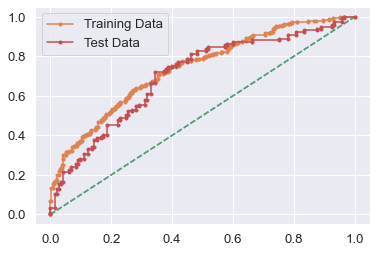

In [692]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(train_labels,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4836
F1 Score 0.6425 

Confusion Matrix


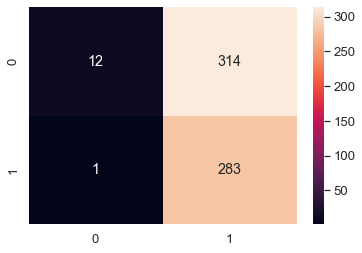

0.2 

Accuracy Score 0.5328
F1 Score 0.6611 

Confusion Matrix


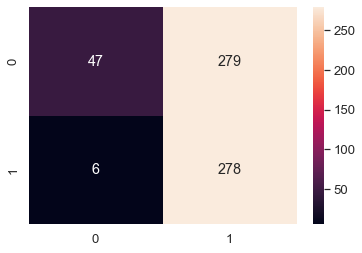

0.3 

Accuracy Score 0.6
F1 Score 0.6755 

Confusion Matrix


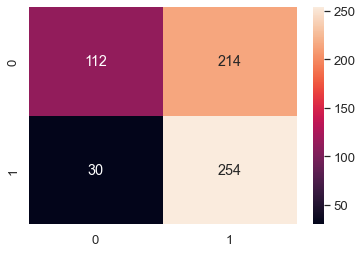

0.4 

Accuracy Score 0.6656
F1 Score 0.6699 

Confusion Matrix


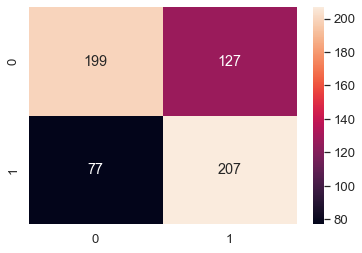

0.5 

Accuracy Score 0.6754
F1 Score 0.6148 

Confusion Matrix


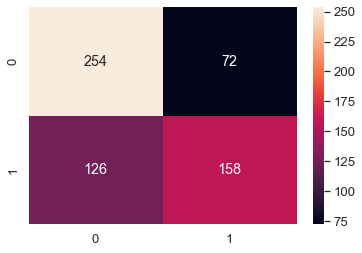

0.6 

Accuracy Score 0.659
F1 Score 0.5378 

Confusion Matrix


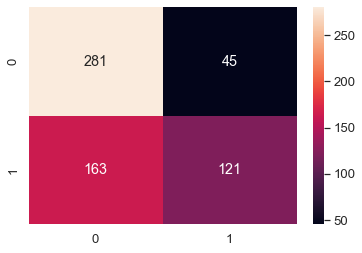

0.7 

Accuracy Score 0.6492
F1 Score 0.4596 

Confusion Matrix


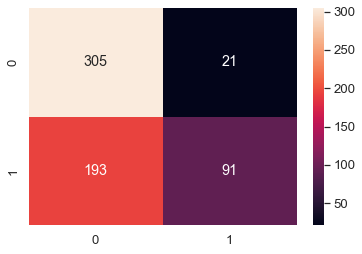

0.8 

Accuracy Score 0.6033
F1 Score 0.2754 

Confusion Matrix


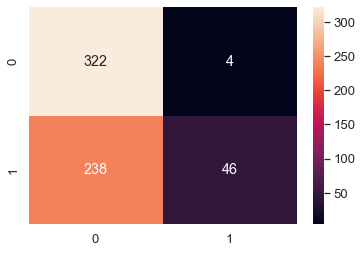

0.9 

Accuracy Score 0.5443
F1 Score 0.0414 

Confusion Matrix


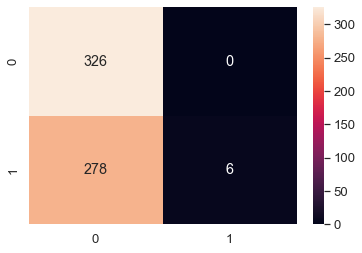

In [695]:
# Change the cut-off values for maximum accuracy test for Train Data
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(train_labels)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(train_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(train_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.1 

Accuracy Score 0.458
F1 Score 0.6162 

Confusion Matrix


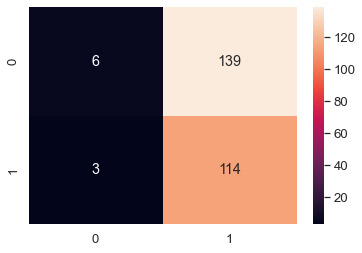

0.2 

Accuracy Score 0.4809
F1 Score 0.618 

Confusion Matrix


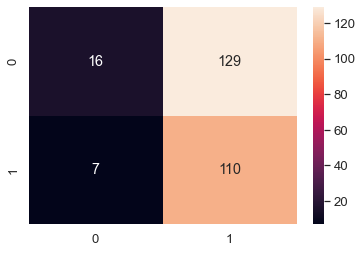

0.3 

Accuracy Score 0.5878
F1 Score 0.6538 

Confusion Matrix


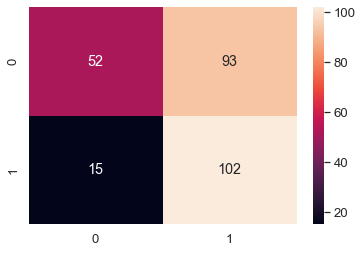

0.4 

Accuracy Score 0.6641
F1 Score 0.6667 

Confusion Matrix


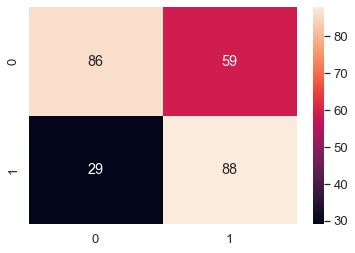

0.5 

Accuracy Score 0.6412
F1 Score 0.5804 

Confusion Matrix


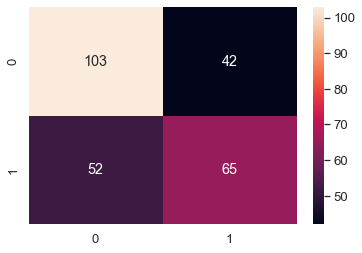

0.6 

Accuracy Score 0.6374
F1 Score 0.5274 

Confusion Matrix


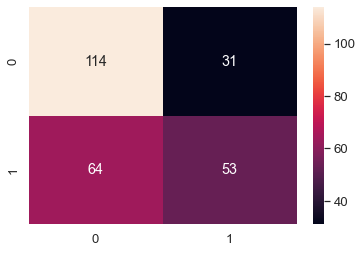

0.7 

Accuracy Score 0.626
F1 Score 0.4167 

Confusion Matrix


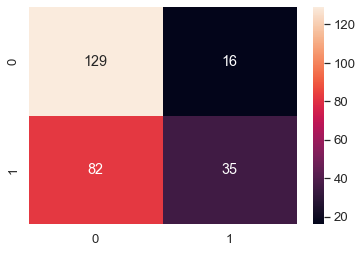

0.8 

Accuracy Score 0.5992
F1 Score 0.2336 

Confusion Matrix


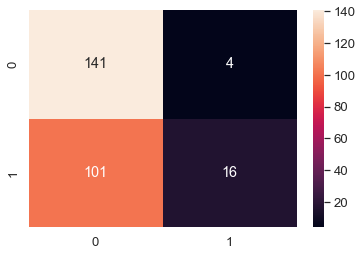

0.9 

Accuracy Score 0.5611
F1 Score 0.0336 

Confusion Matrix


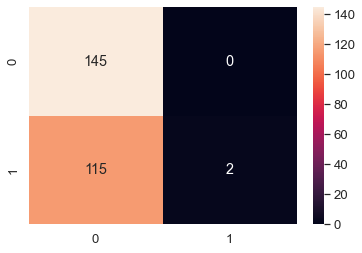

In [696]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j
    custom_cutoff_data=[]
    for i in range(0,len(test_labels)):
        if np.array(pred_prob_test[:,1])[i] > custom_prob: 
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(test_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(test_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(test_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();